In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
from functools import reduce
df = pd.read_excel('genderarrests.xlsx')
df.columns = ['Transit_District', 'Female', 'Male', 'Grand Total']   # Specify column names.
df = df[df.Transit_District != 'Transit Distict']                    # Remove typo and repeating column headers.
df = df[df.Transit_District.notnull()]                               # Remove NaN lines
df = df.drop('Grand Total', axis=1)                                  # Grand Totals removed because we can calc at the end.
my_df1 = df.groupby('Transit_District')['Female'].apply(list).apply(pd.Series)
my_df1.columns = ['FEMALE'+str(i) for i in my_df1.columns]
my_df2 = df.groupby('Transit_District')['Male'].apply(list).apply(pd.Series)
my_df2.columns = ['MALE'+str(i) for i in my_df2.columns]
my_df3 = pd.merge(my_df1, my_df2, left_on='Transit_District', right_on='Transit_District', how='left')
my_df3['Grand Total'] = my_df3.sum(axis=1)
my_df3 = my_df3.iloc[np.r_[0:len(my_df3) - 2, -1, -2]]                               # Flip Grand Total and Unknown (for some reason was flipped)
my_df3.loc['Grand Total'] = my_df3.loc['Grand Total'] - my_df3.loc['Unknown']        # Subtract Unknown values from Grand Total
i = my_df3[(my_df3.FEMALE0 == 18) & ( my_df3.FEMALE1 == 15)].index
my_df3.drop(i, inplace=True)
my_df3

,FEMALE0,FEMALE1,FEMALE2,FEMALE3,FEMALE4,FEMALE5,FEMALE6,MALE0,MALE1,MALE2,MALE3,MALE4,MALE5,MALE6,Grand Total
Transit_District,,,,,,,,,,,,,,,
01,41,22,6,3,4,0,2,481,257,53,53,61,43,34,1060
02,18,7,4,0,2,1,0,228,97,22,13,27,26,9,454
03,9,7,1,2,4,2,3,160,100,15,20,27,28,21,399
04,38,17,6,5,2,15,6,517,325,61,51,57,71,53,1224
11,13,11,9,8,8,5,3,266,131,76,93,94,102,51,870
12,17,15,10,20,22,21,10,269,178,99,146,199,187,93,1286
20,13,13,3,1,6,4,2,152,105,66,54,36,53,41,549
23,9,7,4,4,2,4,2,79,51,32,22,11,24,21,272
30,27,17,18,21,9,13,14,219,156,106,73,58,94,85,910


In [2]:
ef = pd.read_excel('gendersummons.xlsx') 
ef.columns = ['Transit_District', 'Female', 'Male', 'UNKNOWN', 'Grand Total']     # Specify column names.
ef = ef[ef.Transit_District != 'Transit Distict']                                 # Remove typo and repeating column headers.
ef = ef[ef.Transit_District.notnull()]                                            # Remove NaN lines
ef = ef.drop(['Grand Total', 'UNKNOWN'], axis=1)                                  # Grand Totals removed because we can calc at the end.
my_ef1 = ef.groupby('Transit_District')['Female'].apply(list).apply(pd.Series)
my_ef1.columns = ['FEMALE'+str(i) for i in my_ef1.columns]
#'FEMALE0', 'FEMALE1', 'FEMALE2', 'FEMALE3', 'FEMALE4', 'FEMALE5', 'FEMALE6'
my_ef2 = ef.groupby('Transit_District')['Male'].apply(list).apply(pd.Series)
my_ef2.columns = ['MALE'+str(i) for i in my_ef2.columns]
my_ef3 = pd.merge(my_ef1, my_ef2, left_on='Transit_District', right_on='Transit_District', how='left')
#my_df3.columns = ['Transit_District', 'FEMALE0', 'FEMALE1', 'FEMALE2', 'FEMALE3', 'FEMALE4', 'FEMALE5', 'FEMALE6', 'MALE0', 'MALE1', 'MALE2', 'MALE3', 'MALE4', 'MALE5', 'MALE6']
#df.head(16)
my_ef3['Grand Total'] = my_ef3.sum(axis=1)
#my_ef3 = my_ef3.iloc[np.r_[0:len(my_ef3) - 2, -1, -2]]
my_ef3

,FEMALE0,FEMALE1,FEMALE2,FEMALE3,FEMALE4,FEMALE5,FEMALE6,MALE0,MALE1,MALE2,MALE3,MALE4,MALE5,MALE6,Grand Total
Transit_District,,,,,,,,,,,,,,,
01,538,494,456,652,791,990,672,1241,1179,1083,1547,1806,1891,1371,14711
02,375,363,340,454,557,579,424,695,656,626,841,1066,1044,625,8645
03,172,134,141,239,245,397,382,446,319,381,592,724,1052,885,6109
04,353,343,375,574,595,880,562,874,885,791,1107,1226,1675,1171,11411
11,170,120,135,205,252,275,471,490,506,641,888,922,1049,1339,7463
12,127,105,185,524,438,616,505,425,412,571,1650,1597,1789,1409,10353
20,293,258,281,251,261,304,296,669,644,694,623,661,861,731,6827
23,91,115,79,82,90,130,138,250,279,240,241,226,319,297,2577
30,529,359,378,353,371,546,465,850,625,730,813,785,1122,1075,9001


In [3]:
ff = pd.read_excel('racearrests.xlsx')
ff.columns = ['Transit_District', 'American Indian', 'Asian/Pac Isl', 'Black', 'Hispanic', 'Unknown', 'White', 'Grand Total']
ff = ff[ff.Transit_District != 'Transit Distict']                    # Remove typo and repeating column headers.
ff = ff[ff.Transit_District.notnull()]                               # Remove NaN lines
ff = ff.drop(['Grand Total', 'Unknown'], axis=1)
ff1 = ff.groupby('Transit_District')['American Indian'].apply(list).apply(pd.Series)
ff1.columns = ['American Indian'+str(i) for i in ff1.columns]

ff2 = ff.groupby('Transit_District')['Asian/Pac Isl'].apply(list).apply(pd.Series)
ff2.columns = ['Asian/PacIsl'+str(i) for i in ff2.columns]

ff3 = ff.groupby('Transit_District')['Black'].apply(list).apply(pd.Series)
ff3.columns = ['Black'+str(i) for i in ff3.columns]

ff4 = ff.groupby('Transit_District')['Hispanic'].apply(list).apply(pd.Series)
ff4.columns = ['Hispanic'+str(i) for i in ff4.columns]

ff5 = ff.groupby('Transit_District')['White'].apply(list).apply(pd.Series)
ff5.columns = ['White'+str(i) for i in ff5.columns]

ffs = reduce(lambda x,y: pd.merge(x,y, on='Transit_District', how='outer'), [ff1, ff2, ff3, ff4, ff5])
ffs = ffs.iloc[np.r_[0:len(ffs) - 2, -1, -2]]
ffs.loc['Grand Total'] = ffs.loc['Grand Total'] - ffs.loc['Unknown']
i = ffs[(ffs.White0 == 19) & ( ffs.White1 == 14)].index
ffs.drop(i, inplace=True)
ffs['Grand Total'] = ffs.sum(axis=1)
ffs

,American Indian0,American Indian1,American Indian2,American Indian3,American Indian4,American Indian5,American Indian6,Asian/PacIsl0,Asian/PacIsl1,Asian/PacIsl2,...,Hispanic5,Hispanic6,White0,White1,White2,White3,White4,White5,White6,Grand Total
Transit_District,,,,,,,,,,,,,,,,,,,,,
01,0,1,0,0,0,0,0,15,9,2,...,17,6,42,18,5,5,8,7,9,1054
02,0,1,0,0,0,0,0,8,2,0,...,6,4,28,12,1,2,3,4,1,444
03,0,0,0,0,0,0,0,1,0,0,...,8,8,7,5,0,2,0,3,2,398
04,0,1,0,1,0,0,0,7,3,1,...,29,18,38,22,2,5,6,14,11,1211
11,1,0,0,0,0,0,0,0,3,0,...,39,25,8,5,3,3,2,5,4,867
12,0,0,1,0,0,0,0,3,1,0,...,76,29,5,9,2,4,8,8,5,1281
20,1,1,0,0,0,0,1,15,9,9,...,28,18,8,12,2,0,2,7,2,536
23,1,0,0,0,0,0,0,1,1,2,...,5,1,3,3,1,0,2,1,1,267
30,0,0,0,0,0,0,0,2,1,3,...,18,14,18,16,11,12,6,13,10,904


In [4]:
gf = pd.read_excel('racesummons.xlsx')
gf.columns = ['Transit_District', 'American Indian', 'Asian/Pac Isl', 'Black', 'Hispanic', 'Unknown', 'White', 'Grand Total']
gf = gf[gf.Transit_District != 'Transit Distict']                    # Remove typo and repeating column headers.
gf = gf[gf.Transit_District.notnull()]                               # Remove NaN lines
gf = gf.drop(['Grand Total', 'Unknown'], axis=1)
gf1 = gf.groupby('Transit_District')['American Indian'].apply(list).apply(pd.Series)
gf1.columns = ['American Indian'+str(i) for i in gf1.columns]

gf2 = gf.groupby('Transit_District')['Asian/Pac Isl'].apply(list).apply(pd.Series)
gf2.columns = ['Asian/PacIsl'+str(i) for i in gf2.columns]

gf3 = gf.groupby('Transit_District')['Black'].apply(list).apply(pd.Series)
gf3.columns = ['Black'+str(i) for i in gf3.columns]

gf4 = gf.groupby('Transit_District')['Hispanic'].apply(list).apply(pd.Series)
gf4.columns = ['Hispanic'+str(i) for i in gf4.columns]

gf5 = gf.groupby('Transit_District')['White'].apply(list).apply(pd.Series)
gf5.columns = ['White'+str(i) for i in gf5.columns]

gfs = reduce(lambda x,y: pd.merge(x,y, on='Transit_District', how='outer'), [gf1, gf2, gf3, gf4, gf5])
gfs['Grand Total'] = gfs.sum(axis=1)
gfs

,American Indian0,American Indian1,American Indian2,American Indian3,American Indian4,American Indian5,American Indian6,Asian/PacIsl0,Asian/PacIsl1,Asian/PacIsl2,...,Hispanic5,Hispanic6,White0,White1,White2,White3,White4,White5,White6,Grand Total
Transit_District,,,,,,,,,,,,,,,,,,,,,
01,8,10,7,8,15,13,8,134,117,92,...,832,598,473,431,381,498,676,752,517,13890
02,6,6,8,13,10,5,8,137,125,102,...,363,243,284,295,308,358,435,447,281,7938
03,3,1,0,0,2,2,3,21,23,21,...,445,461,101,77,90,130,154,164,191,5982
04,6,11,3,6,17,12,12,64,89,65,...,665,503,338,352,366,501,544,783,476,10904
11,0,1,0,1,2,1,2,12,13,8,...,669,866,26,21,39,39,37,67,97,7373
12,1,0,1,9,0,7,6,10,8,10,...,1039,912,28,20,24,89,87,126,79,10214
20,11,14,14,12,10,15,19,135,117,123,...,505,430,81,69,79,87,83,77,85,5824
23,4,4,3,1,0,7,2,19,31,17,...,117,88,25,24,23,15,18,21,28,2290
30,2,3,2,2,2,8,1,79,83,84,...,322,301,320,200,220,198,202,314,301,8567


In [5]:
hf = pd.read_excel('agearrests.xlsx')
hf.columns = ['Transit_District', '10-17', '18-24', '25-40', '41-59', '60+', 'Grand Total']
hf = hf[hf.Transit_District != 'Transit Distict']                    # Remove typo and repeating column headers.
hf = hf[hf.Transit_District.notnull()]                               # Remove NaN lines
hf = hf.drop('Grand Total', axis=1)
hf1 = hf.groupby('Transit_District')['10-17'].apply(list).apply(pd.Series)
hf1.columns = ['10-17('+ str(i) + ')' for i in hf1.columns]

hf2 = hf.groupby('Transit_District')['18-24'].apply(list).apply(pd.Series)
hf2.columns = ['18-24('+str(i) + ')' for i in hf2.columns]

hf3 = hf.groupby('Transit_District')['25-40'].apply(list).apply(pd.Series)
hf3.columns = ['25-40('+str(i) + ')' for i in hf3.columns]

hf4 = hf.groupby('Transit_District')['41-59'].apply(list).apply(pd.Series)
hf4.columns = ['41-59('+str(i) + ')' for i in hf4.columns]

hf5 = hf.groupby('Transit_District')['60+'].apply(list).apply(pd.Series)
hf5.columns = ['60+('+str(i) + ')' for i in hf5.columns]

hfs = reduce(lambda x,y: pd.merge(x,y, on='Transit_District', how='outer'), [hf1, hf2, hf3, hf4, hf5])

hfs.loc['Grand Total'] = hfs.loc['Grand Total'] - hfs.loc['Unknown']
hfs.drop('Unknown', inplace=True)
hfs['Grand Total'] = hfs.sum(axis=1)
hfs

,10-17(0),10-17(1),10-17(2),10-17(3),10-17(4),10-17(5),10-17(6),18-24(0),18-24(1),18-24(2),...,41-59(5),41-59(6),60+(0),60+(1),60+(2),60+(3),60+(4),60+(5),60+(6),Grand Total
Transit_District,,,,,,,,,,,,,,,,,,,,,
01,8,4,4,0,0,0,0,186,104,13,...,6,8,9,2,3,1,0,1,2,1060
02,4,2,0,0,0,0,1,70,28,10,...,8,2,5,2,0,1,1,1,0,454
03,3,7,1,0,0,1,1,56,23,7,...,6,7,5,2,0,0,2,0,0,399
04,10,4,2,0,0,0,1,149,79,18,...,24,26,12,8,1,1,2,1,2,1224
11,19,5,0,4,1,0,0,91,43,22,...,31,16,5,3,2,2,1,1,1,870
12,11,6,2,6,3,5,0,97,61,27,...,55,33,4,2,1,3,3,3,3,1286
20,2,8,2,5,0,1,0,68,37,29,...,9,3,2,0,0,0,0,1,1,549
23,6,2,2,1,0,0,0,34,25,13,...,2,3,1,0,0,1,0,0,0,272
30,7,3,1,5,0,3,1,73,56,46,...,24,23,4,2,0,0,1,0,1,910


In [6]:
jf = pd.read_excel('agesummons.xlsx')
jf.columns = ['Transit_District', '10-17', '18-24', '25-40', '41-59', '60+', 'Unknown', 'Grand Total']
jf = jf[jf.Transit_District != 'Transit Distict']                    # Remove typo and repeating column headers.
jf = jf[jf.Transit_District.notnull()]                               # Remove NaN lines
jf = jf.drop(['Grand Total', 'Unknown'], axis=1)
jf1 = jf.groupby('Transit_District')['10-17'].apply(list).apply(pd.Series)
jf1.columns = ['10-17('+ str(i) + ')' for i in jf1.columns]

jf2 = jf.groupby('Transit_District')['18-24'].apply(list).apply(pd.Series)
jf2.columns = ['18-24('+str(i) + ')' for i in jf2.columns]

jf3 = jf.groupby('Transit_District')['25-40'].apply(list).apply(pd.Series)
jf3.columns = ['25-40('+str(i) + ')' for i in jf3.columns]

jf4 = jf.groupby('Transit_District')['41-59'].apply(list).apply(pd.Series)
jf4.columns = ['41-59('+str(i) + ')' for i in jf4.columns]

jf5 = jf.groupby('Transit_District')['60+'].apply(list).apply(pd.Series)
jf5.columns = ['60+('+str(i) + ')' for i in jf5.columns]

jfs = reduce(lambda x,y: pd.merge(x,y, on='Transit_District', how='outer'), [jf1, jf2, jf3, jf4, jf5])
jfs['Grand Total'] = jfs.sum(axis=1)
jfs

,10-17(0),10-17(1),10-17(2),10-17(3),10-17(4),10-17(5),10-17(6),18-24(0),18-24(1),18-24(2),...,41-59(5),41-59(6),60+(0),60+(1),60+(2),60+(3),60+(4),60+(5),60+(6),Grand Total
Transit_District,,,,,,,,,,,,,,,,,,,,,
01,80,75,68,121,92,93,50,810,789,701,...,435,306,27,20,21,23,48,57,41,14710
02,37,40,39,60,64,50,35,440,398,422,...,241,137,23,18,25,21,40,52,26,8651
03,52,53,44,86,71,83,93,239,189,194,...,312,217,14,5,17,18,31,55,32,6111
04,38,45,46,65,41,86,55,554,507,474,...,376,287,9,11,21,24,23,36,21,11418
11,53,52,47,92,50,49,57,284,276,302,...,253,320,4,2,17,13,12,22,36,7474
12,62,56,87,191,109,102,88,256,224,287,...,445,348,6,5,9,27,34,28,20,10356
20,89,66,72,69,48,74,45,420,367,401,...,190,186,10,10,15,10,13,26,26,6825
23,39,55,43,30,12,22,24,151,177,126,...,104,91,6,3,4,12,14,12,22,2577
30,137,98,81,109,111,113,114,605,381,462,...,216,192,17,14,7,13,13,10,12,9006


/Users/woohyukchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/woohyukchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


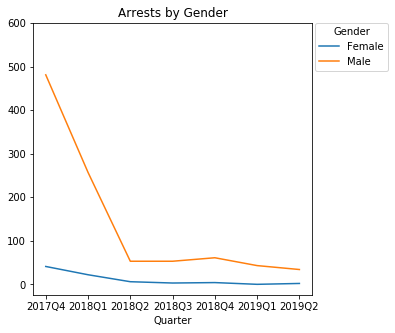

<Figure size 432x288 with 0 Axes>

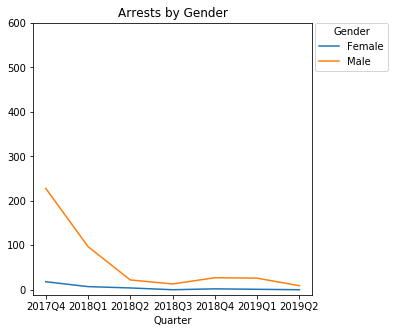

<Figure size 432x288 with 0 Axes>

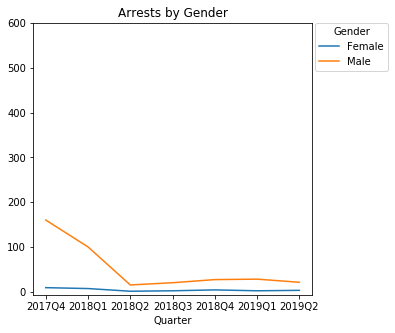

<Figure size 432x288 with 0 Axes>

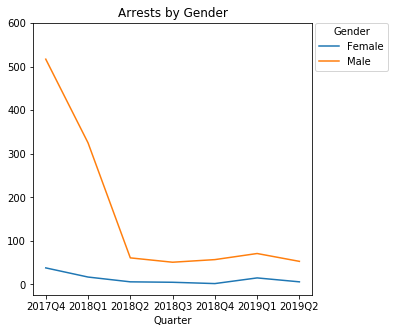

<Figure size 432x288 with 0 Axes>

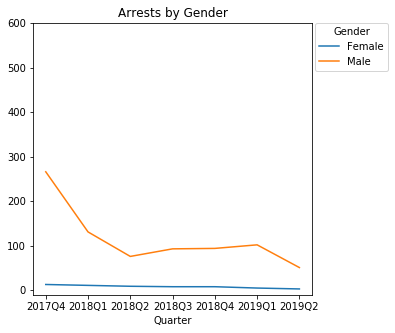

<Figure size 432x288 with 0 Axes>

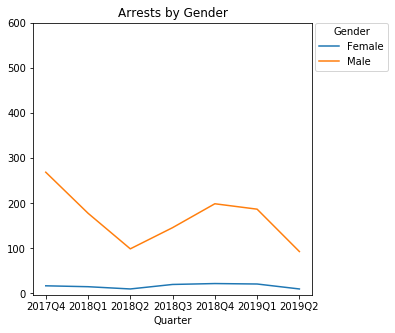

<Figure size 432x288 with 0 Axes>

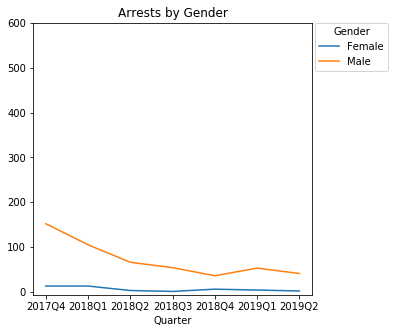

<Figure size 432x288 with 0 Axes>

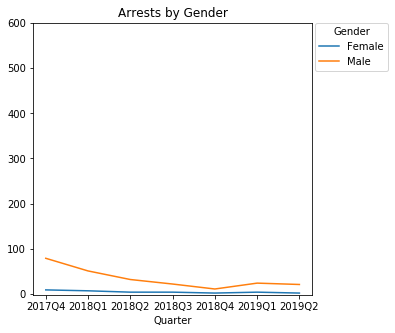

<Figure size 432x288 with 0 Axes>

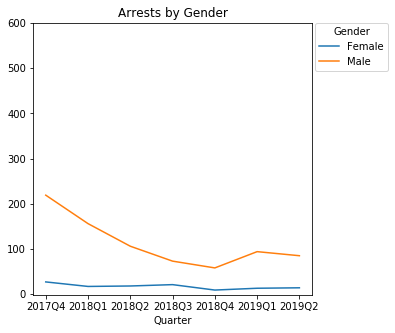

<Figure size 432x288 with 0 Axes>

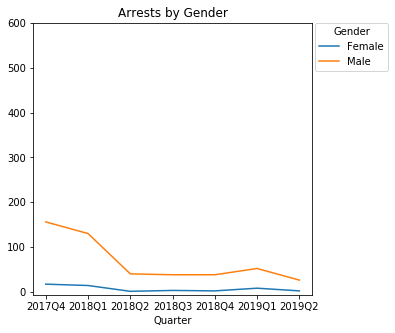

<Figure size 432x288 with 0 Axes>

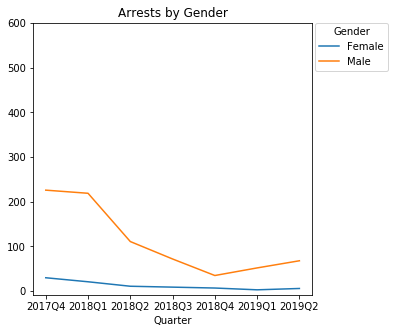

<Figure size 432x288 with 0 Axes>

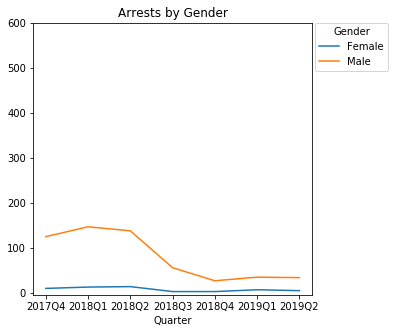

<Figure size 432x288 with 0 Axes>

In [30]:
for i in range(0,12):
    fig = plt.figure(figsize=(5, 5))
    values = [float(my_df3.iloc[i, 0]), float(my_df3.iloc[i, 1]), float(my_df3.iloc[i, 2]), 
             float(my_df3.iloc[i, 3]), float(my_df3.iloc[i, 4]), float(my_df3.iloc[i,5]), float(my_df3.iloc[i,6])]
    values1 = [float(my_df3.iloc[i, 7]), float(my_df3.iloc[i, 8]), float(my_df3.iloc[i, 9]), 
              float(my_df3.iloc[i, 10]), float(my_df3.iloc[i, 11]), float(my_df3.iloc[i,12]), float(my_df3.iloc[i,13])]
    plt.plot(values, label='Female')
    plt.plot(values1, label='Male')
    plt.xticks(np.arange(7), ('2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2'))
    plt.yticks([0,100,200,300,400,500,600])
    plt.title('Arrests by Gender')
    plt.xlabel('Quarter')
    #plt.ylabel('Number of People')
    #plt.legend()
    plt.legend(bbox_to_anchor=(1.29, 1.02), title="Gender")
    plt.figure()
    #plt.savefig("ArrestsG" + str(i) + ".png", bbox_inches='tight')


/Users/woohyukchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/woohyukchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


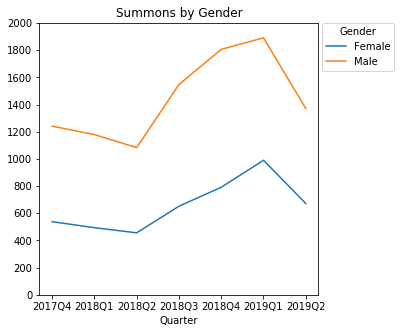

<Figure size 432x288 with 0 Axes>

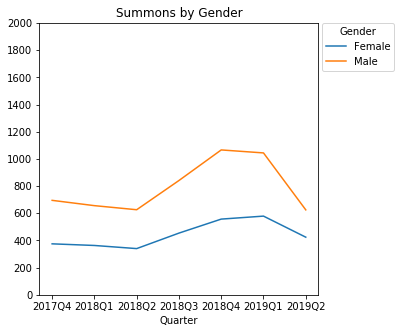

<Figure size 432x288 with 0 Axes>

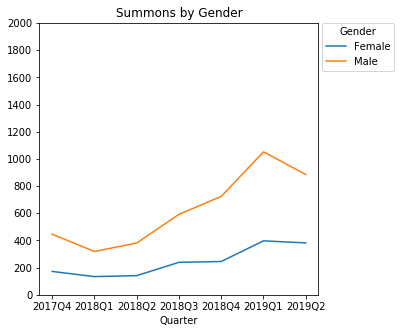

<Figure size 432x288 with 0 Axes>

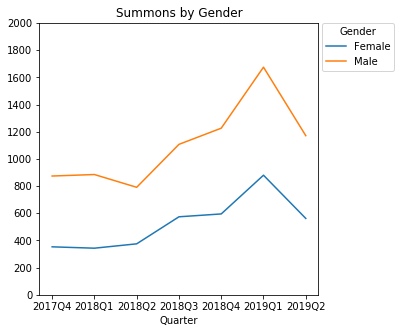

<Figure size 432x288 with 0 Axes>

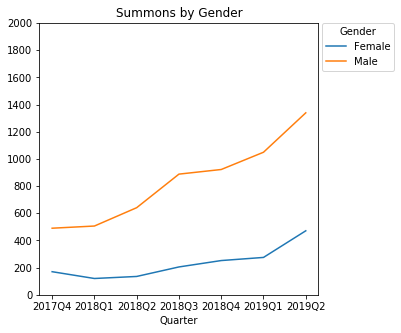

<Figure size 432x288 with 0 Axes>

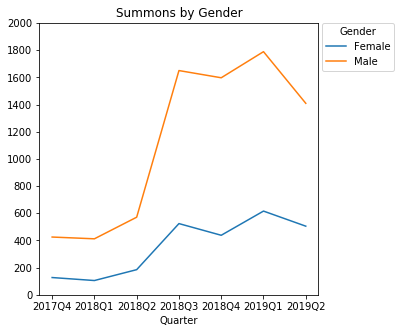

<Figure size 432x288 with 0 Axes>

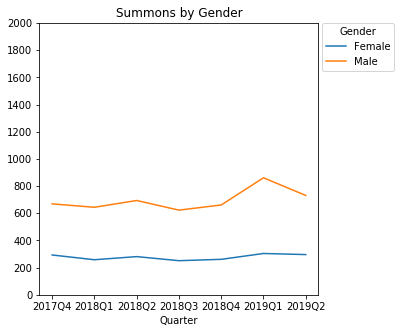

<Figure size 432x288 with 0 Axes>

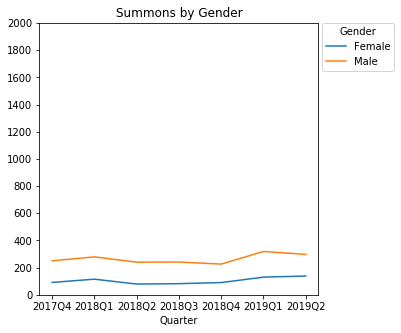

<Figure size 432x288 with 0 Axes>

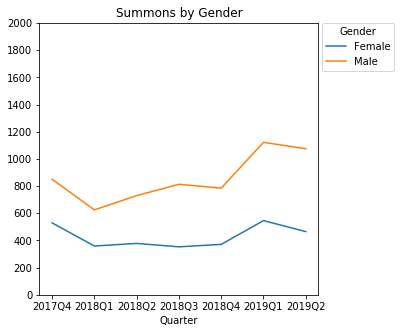

<Figure size 432x288 with 0 Axes>

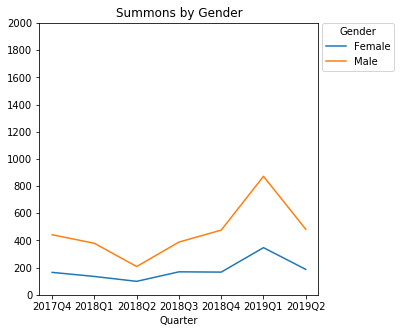

<Figure size 432x288 with 0 Axes>

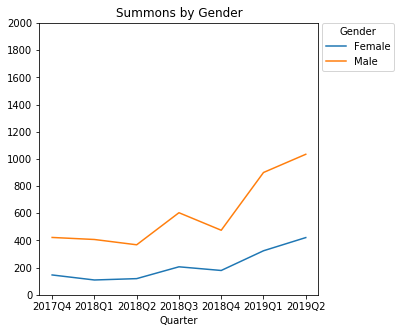

<Figure size 432x288 with 0 Axes>

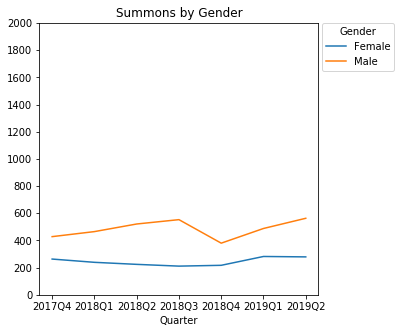

<Figure size 432x288 with 0 Axes>

In [31]:
for i in range(0,12):
    plt.figure(figsize=(5, 5))
    values = [float(my_ef3.iloc[i, 0]), float(my_ef3.iloc[i, 1]), float(my_ef3.iloc[i, 2]), 
              float(my_ef3.iloc[i, 3]), float(my_ef3.iloc[i, 4]), float(my_ef3.iloc[i,5]), float(my_ef3.iloc[i,6])]
    values1 = [float(my_ef3.iloc[i, 7]), float(my_ef3.iloc[i, 8]), float(my_ef3.iloc[i, 9]), 
              float(my_ef3.iloc[i, 10]), float(my_ef3.iloc[i, 11]), float(my_ef3.iloc[i,12]), float(my_ef3.iloc[i,13])]
    plt.plot(values, label='Female')
    plt.plot(values1, label='Male')
    plt.xticks(np.arange(7), ('2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2'))
    plt.yticks([0,200,400,600,800,1000,1200, 1400, 1600, 1800, 2000])
    plt.title('Summons by Gender')
    plt.xlabel('Quarter')
    #plt.ylabel('Number of People')
    #plt.legend()
    plt.legend(bbox_to_anchor=(1.29, 1.02), title="Gender")
    plt.figure()
    #plt.savefig("SummonsG" + str(i) + ".png", bbox_inches='tight')

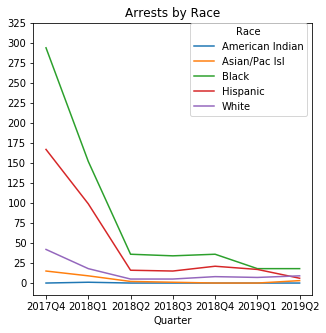

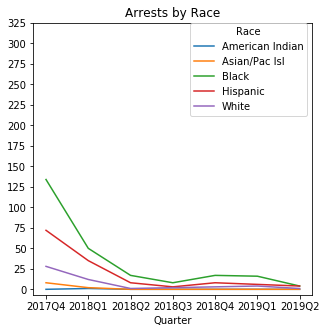

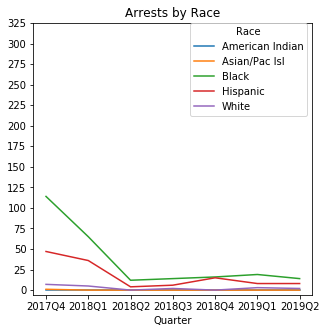

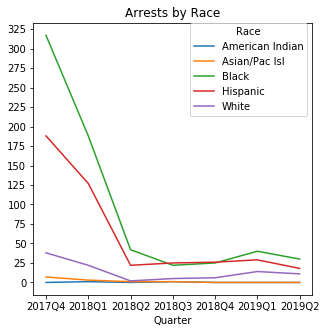

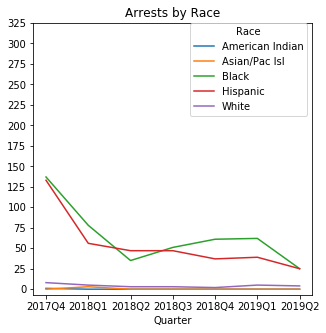

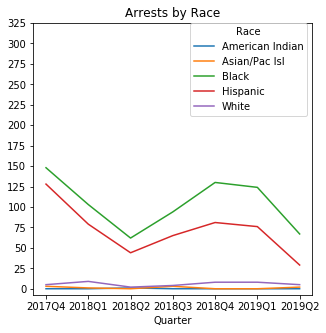

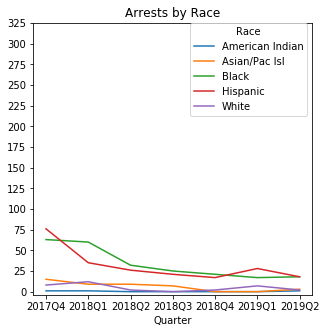

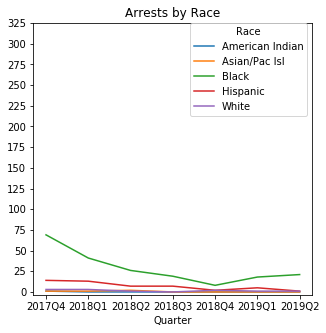

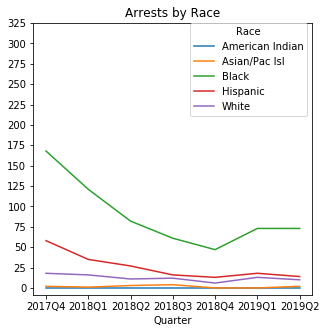

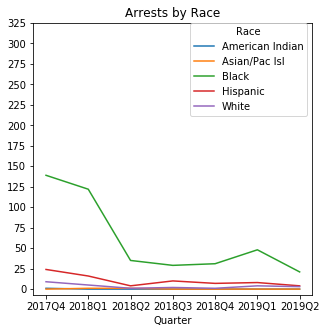

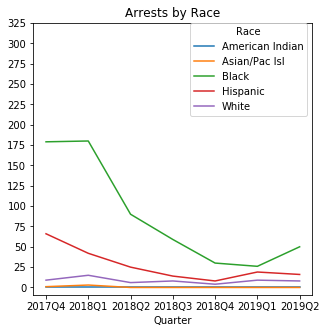

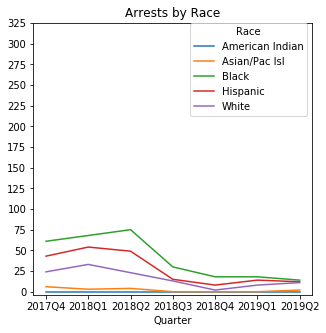

In [33]:
for i in range(0,12):
    plt.figure(figsize=(5, 5))
    values0 = [float(ffs.iloc[i, 0]), float(ffs.iloc[i, 1]), float(ffs.iloc[i, 2]), 
              float(ffs.iloc[i, 3]), float(ffs.iloc[i, 4]), float(ffs.iloc[i,5]), float(ffs.iloc[i,6])]
    
    values1 = [float(ffs.iloc[i, 7]), float(ffs.iloc[i, 8]), float(ffs.iloc[i, 9]), 
              float(ffs.iloc[i, 10]), float(ffs.iloc[i, 11]), float(ffs.iloc[i,12]), float(ffs.iloc[i,13])]
    
    values2 = [float(ffs.iloc[i, 14]), float(ffs.iloc[i, 15]), float(ffs.iloc[i, 16]), 
              float(ffs.iloc[i, 17]), float(ffs.iloc[i, 18]), float(ffs.iloc[i,19]), float(ffs.iloc[i,20])]
    
    values3 = [float(ffs.iloc[i, 21]), float(ffs.iloc[i, 22]), float(ffs.iloc[i, 23]), 
              float(ffs.iloc[i, 24]), float(ffs.iloc[i, 25]), float(ffs.iloc[i,26]), float(ffs.iloc[i,27])]
    
    values4 = [float(ffs.iloc[i, 28]), float(ffs.iloc[i, 29]), float(ffs.iloc[i, 30]), 
              float(ffs.iloc[i, 31]), float(ffs.iloc[i, 32]), float(ffs.iloc[i,33]), float(ffs.iloc[i,34])]
    plt.plot(values0, label='American Indian')
    plt.plot(values1, label='Asian/Pac Isl')
    plt.plot(values2, label='Black')
    plt.plot(values3, label='Hispanic')
    plt.plot(values4, label='White')
    plt.xticks(np.arange(7), ('2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2'))
    plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325])
    plt.title('Arrests by Race')
    plt.xlabel('Quarter')
    #plt.ylabel('Number of People')
    plt.legend(bbox_to_anchor=(1, 1.02), title="Race")
    plt.savefig("ArrestsR" + str(i) + ".png", bbox_inches='tight')

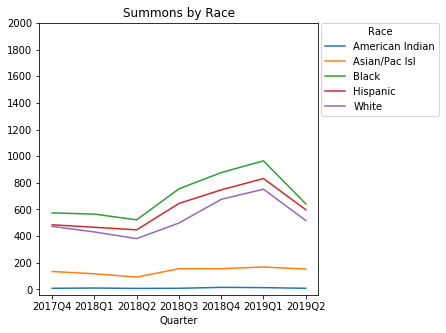

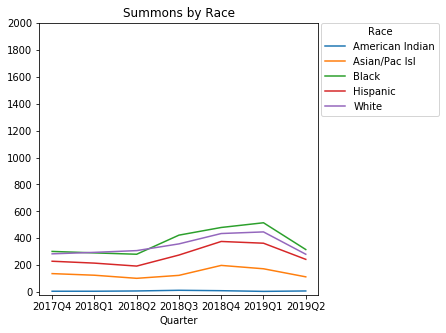

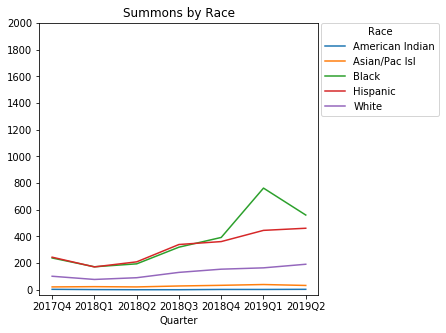

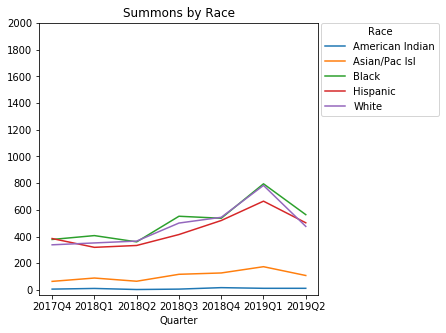

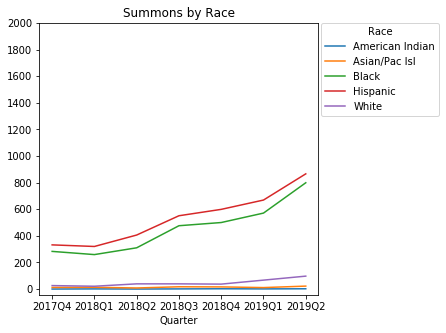

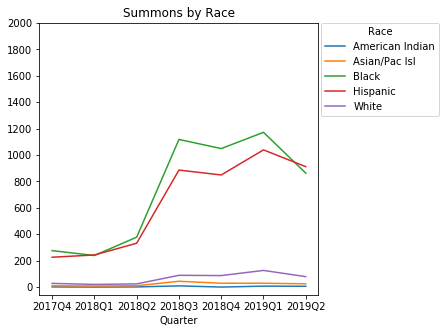

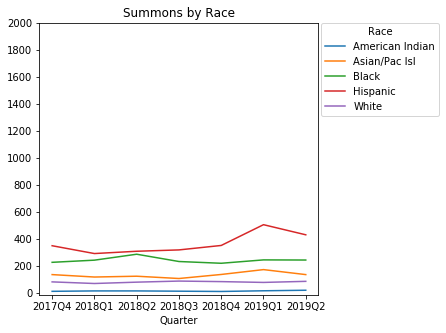

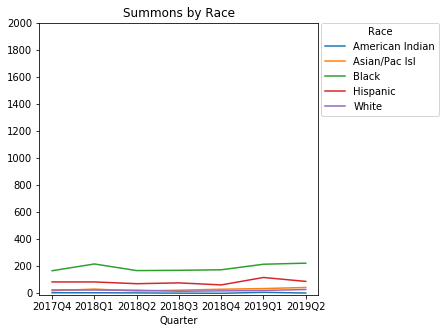

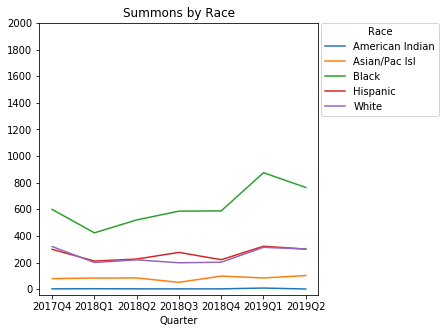

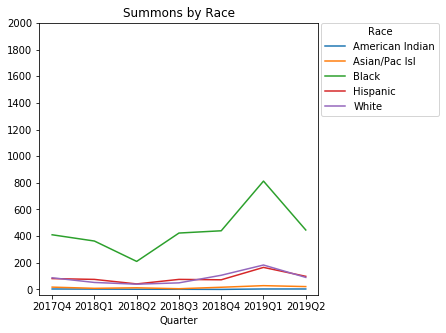

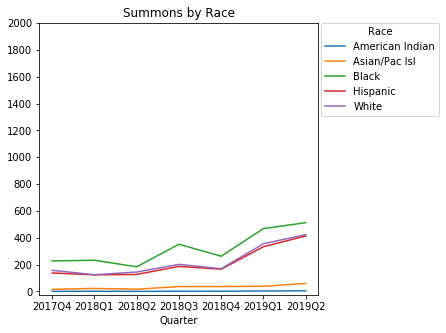

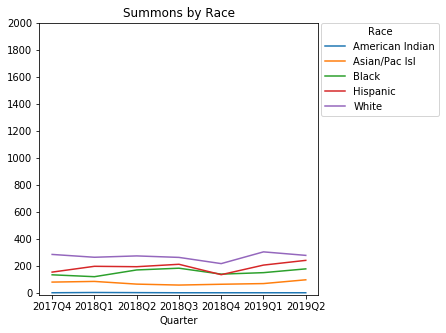

In [37]:
for i in range(0,12):
    plt.figure(figsize=(5, 5))
    values0 = [float(gfs.iloc[i, 0]), float(gfs.iloc[i, 1]), float(gfs.iloc[i, 2]), 
              float(gfs.iloc[i, 3]), float(gfs.iloc[i, 4]), float(gfs.iloc[i,5]), float(gfs.iloc[i,6])]
    
    values1 = [float(gfs.iloc[i, 7]), float(gfs.iloc[i, 8]), float(gfs.iloc[i, 9]), 
              float(gfs.iloc[i, 10]), float(gfs.iloc[i, 11]), float(gfs.iloc[i,12]), float(gfs.iloc[i,13])]
    
    values2 = [float(gfs.iloc[i, 14]), float(gfs.iloc[i, 15]), float(gfs.iloc[i, 16]), 
              float(gfs.iloc[i, 17]), float(gfs.iloc[i, 18]), float(gfs.iloc[i,19]), float(gfs.iloc[i,20])]
    
    values3 = [float(gfs.iloc[i, 21]), float(gfs.iloc[i, 22]), float(gfs.iloc[i, 23]), 
              float(gfs.iloc[i, 24]), float(gfs.iloc[i, 25]), float(gfs.iloc[i,26]), float(gfs.iloc[i,27])]
    
    values4 = [float(gfs.iloc[i, 28]), float(gfs.iloc[i, 29]), float(gfs.iloc[i, 30]), 
              float(gfs.iloc[i, 31]), float(gfs.iloc[i, 32]), float(gfs.iloc[i,33]), float(gfs.iloc[i,34])]
    plt.plot(values0, label='American Indian')
    plt.plot(values1, label='Asian/Pac Isl')
    plt.plot(values2, label='Black')
    plt.plot(values3, label='Hispanic')
    plt.plot(values4, label='White')
    plt.xticks(np.arange(7), ('2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2'))
    plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
    plt.title('Summons by Race')
    plt.xlabel('Quarter')
    #plt.ylabel('Number of People')
    plt.legend(bbox_to_anchor=(1.45, 1.02), title="Race")
    plt.savefig("SummonsR" + str(i) + ".png", bbox_inches='tight')

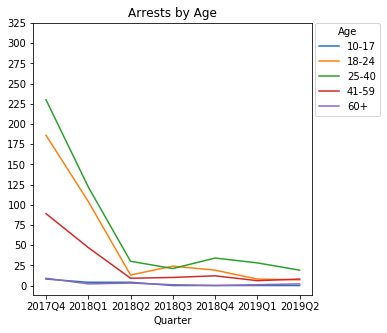

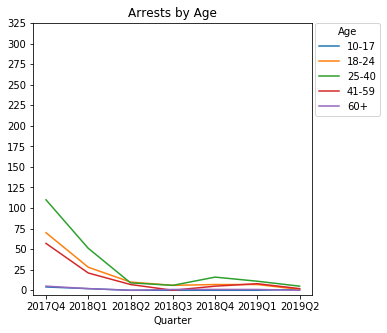

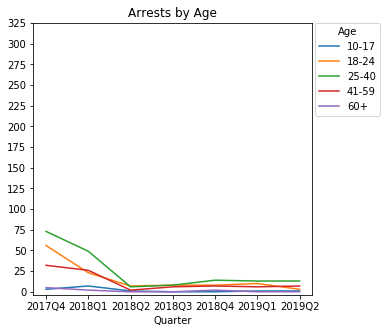

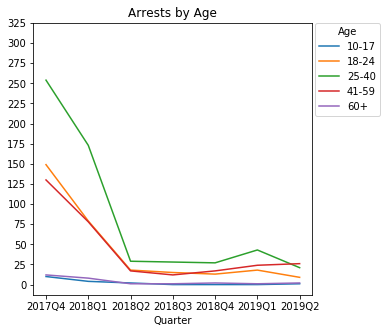

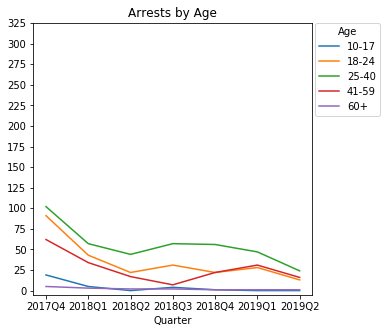

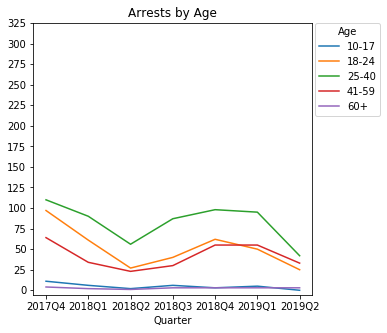

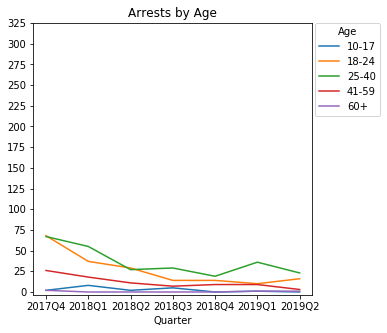

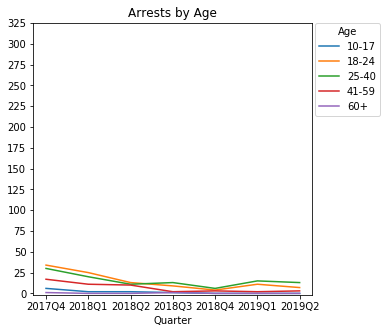

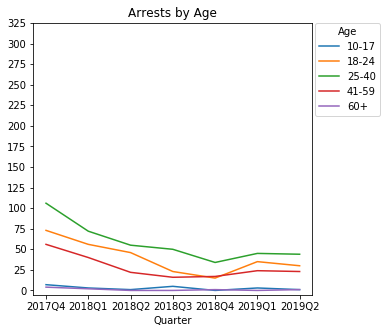

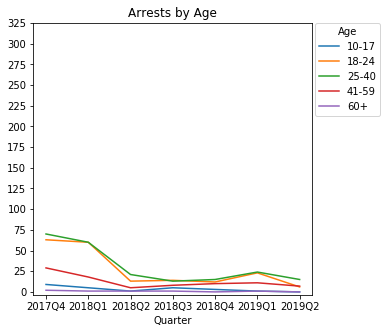

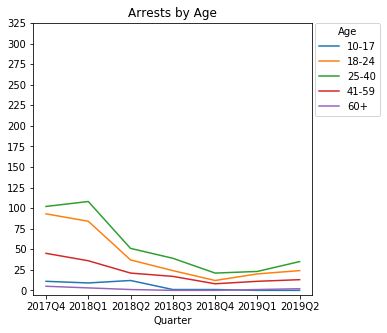

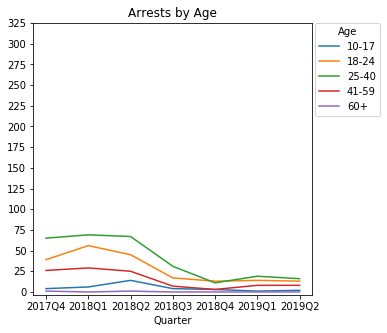

In [34]:
for i in range(0,12):
    plt.figure(figsize=(5, 5))
    values0 = [float(hfs.iloc[i, 0]), float(hfs.iloc[i, 1]), float(hfs.iloc[i, 2]), 
              float(hfs.iloc[i, 3]), float(hfs.iloc[i, 4]), float(hfs.iloc[i,5]), float(hfs.iloc[i,6])]
    
    values1 = [float(hfs.iloc[i, 7]), float(hfs.iloc[i, 8]), float(hfs.iloc[i, 9]), 
              float(hfs.iloc[i, 10]), float(hfs.iloc[i, 11]), float(hfs.iloc[i,12]), float(hfs.iloc[i,13])]
    
    values2 = [float(hfs.iloc[i, 14]), float(hfs.iloc[i, 15]), float(hfs.iloc[i, 16]), 
              float(hfs.iloc[i, 17]), float(hfs.iloc[i, 18]), float(hfs.iloc[i,19]), float(hfs.iloc[i,20])]
    
    values3 = [float(hfs.iloc[i, 21]), float(hfs.iloc[i, 22]), float(hfs.iloc[i, 23]), 
              float(hfs.iloc[i, 24]), float(hfs.iloc[i, 25]), float(hfs.iloc[i,26]), float(hfs.iloc[i,27])]
    
    values4 = [float(hfs.iloc[i, 28]), float(hfs.iloc[i, 29]), float(hfs.iloc[i, 30]), 
              float(hfs.iloc[i, 31]), float(hfs.iloc[i, 32]), float(hfs.iloc[i,33]), float(hfs.iloc[i,34])]
    plt.plot(values0, label='10-17')
    plt.plot(values1, label='18-24')
    plt.plot(values2, label='25-40')
    plt.plot(values3, label='41-59')
    plt.plot(values4, label='60+')
    plt.xticks(np.arange(7), ('2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2'))
    plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325])
    plt.title('Arrests by Age')
    plt.xlabel('Quarter')
    #plt.ylabel('Number of People')
    #plt.legend(bbox_to_anchor=(1, 1.02), title="Age")
    plt.legend(bbox_to_anchor=(1.26, 1.02), loc='upper right', title="Age")
    plt.savefig("ArrestsA" + str(i) + ".png", bbox_inches='tight')

/Users/woohyukchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/woohyukchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


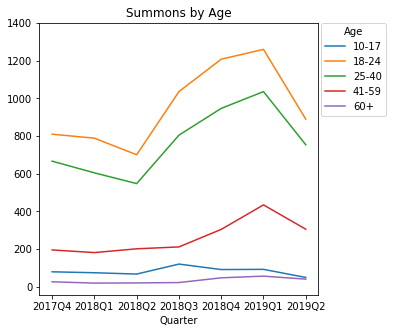

<Figure size 432x288 with 0 Axes>

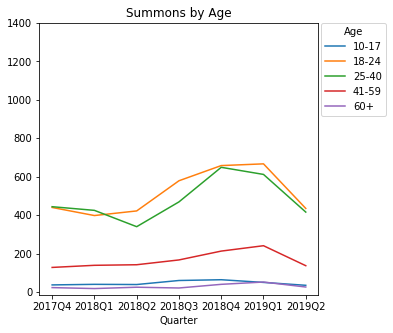

<Figure size 432x288 with 0 Axes>

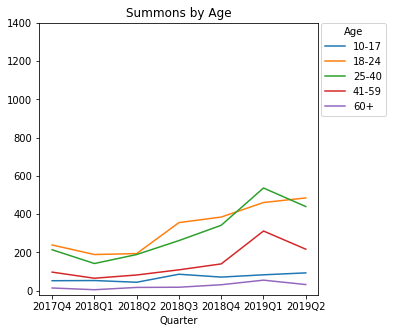

<Figure size 432x288 with 0 Axes>

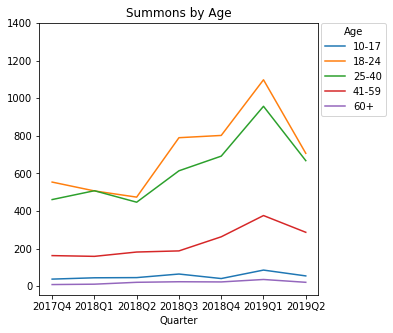

<Figure size 432x288 with 0 Axes>

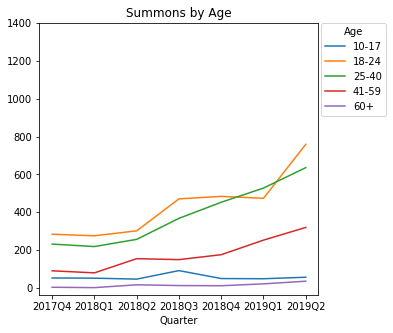

<Figure size 432x288 with 0 Axes>

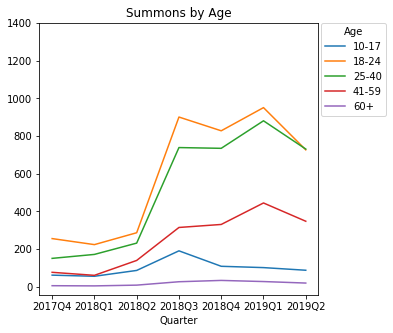

<Figure size 432x288 with 0 Axes>

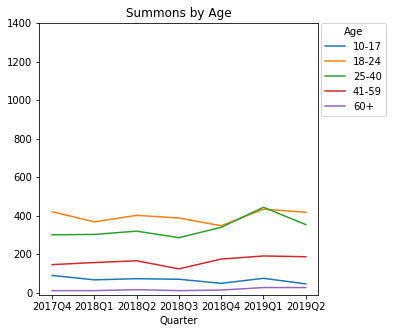

<Figure size 432x288 with 0 Axes>

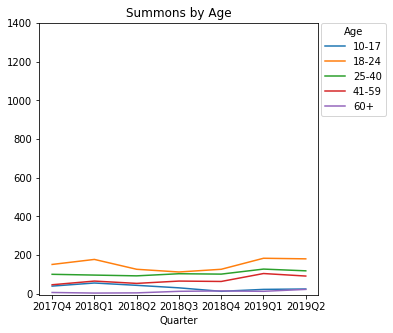

<Figure size 432x288 with 0 Axes>

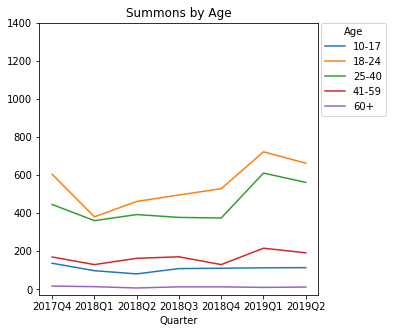

<Figure size 432x288 with 0 Axes>

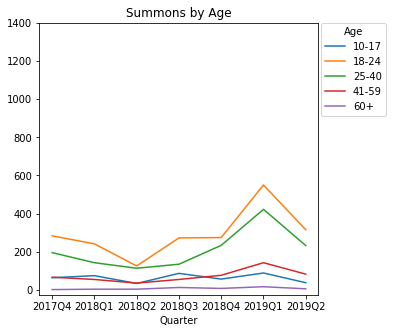

<Figure size 432x288 with 0 Axes>

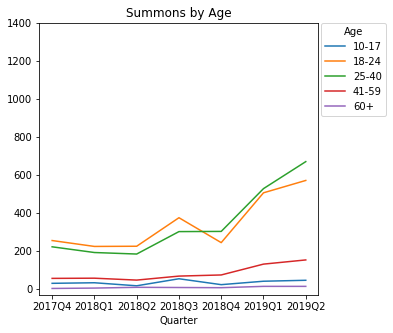

<Figure size 432x288 with 0 Axes>

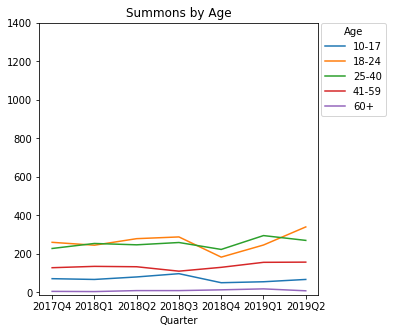

<Figure size 432x288 with 0 Axes>

In [36]:
for i in range(0,12):
    plt.figure(figsize=(5, 5))
    values0 = [float(jfs.iloc[i, 0]), float(jfs.iloc[i, 1]), float(jfs.iloc[i, 2]), 
              float(jfs.iloc[i, 3]), float(jfs.iloc[i, 4]), float(jfs.iloc[i,5]), float(jfs.iloc[i,6])]
    
    values1 = [float(jfs.iloc[i, 7]), float(jfs.iloc[i, 8]), float(jfs.iloc[i, 9]), 
              float(jfs.iloc[i, 10]), float(jfs.iloc[i, 11]), float(jfs.iloc[i,12]), float(jfs.iloc[i,13])]
    
    values2 = [float(jfs.iloc[i, 14]), float(jfs.iloc[i, 15]), float(jfs.iloc[i, 16]), 
              float(jfs.iloc[i, 17]), float(jfs.iloc[i, 18]), float(jfs.iloc[i,19]), float(jfs.iloc[i,20])]
    
    values3 = [float(jfs.iloc[i, 21]), float(jfs.iloc[i, 22]), float(jfs.iloc[i, 23]), 
              float(jfs.iloc[i, 24]), float(jfs.iloc[i, 25]), float(jfs.iloc[i,26]), float(jfs.iloc[i,27])]
    
    values4 = [float(jfs.iloc[i, 28]), float(jfs.iloc[i, 29]), float(jfs.iloc[i, 30]), 
              float(jfs.iloc[i, 31]), float(jfs.iloc[i, 32]), float(jfs.iloc[i,33]), float(jfs.iloc[i,34])]
    plt.plot(values0, label='10-17')
    plt.plot(values1, label='18-24')
    plt.plot(values2, label='25-40')
    plt.plot(values3, label='41-59')
    plt.plot(values4, label='60+')
    plt.xticks(np.arange(7), ('2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2'))
    plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400])
    plt.title('Summons by Age')
    plt.xlabel('Quarter')
    #plt.ylabel('Number of People')
    plt.legend(bbox_to_anchor=(1.26, 1.02), loc='upper right', title="Age")
    #plt.savefig("SummonsA" + str(i) + ".png", bbox_inches='tight')
    plt.figure()
